## Initialization

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import Normalize

### Test functions

In [2]:
def Rast(X,A):
    test = A*X.shape[0]+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)
    #test = A+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)/X.shape[0]
    return test    
    

## First Order

### N2 Normalization

In [212]:
a_3

4.572530469464154e-81

In [6]:
#Parameters
T = 1.5 #Time
h = 0.0015 #Time-step
ite = int(T/h) #Iterations
A = 10 #Rastrigin parameter
d = 2 #System dimensions
N = 15 #Particle amount
runs = 1000

#Arrays for boxplots

box_3 = np.zeros((1,runs))
box_4 = np.zeros((1,runs))

#Arrays for distance from minima
"""
dist_3 = np.zeros((1,ite))
dist_4 = np.zeros((1,ite))
"""
#Arrays for contour plots
"""
X_save_3 = np.zeros((2,N*ite))
X_save_4 = np.zeros((2,N*ite))
"""
#Result array
results = np.zeros((2,4))


N=15
h_var = 0.1
h_array = np.array([0.0015, 0.003,0.005,0.01])
for j in range(4):
    T = 1.5 #Time
    h = h_array[j] #Time-step
    ite = int(T/h) #Iterations
    
    count_3 = 0
    count_4 = 0
    for y in range(runs):
        
        #Particle Initialization
        X = np.random.rand(d,N)
        lower_bound = -3
        upper_bound = 3
        X = lower_bound + (upper_bound - lower_bound) * X

        X_3 = X
        X_4 = X
        
        for x in range(ite):
            # Start with large noise, which linearly decreases with time
            if x <= ite-50:
                beta = 0.015
                beta2 = 0.2
            else: 
                beta = 15400
                beta2 = 15400
            
            """
            tempa_3 = np.clip(Rast(X_3,A), -10, 10)
            
            a_3 = np.sum(np.exp(-10*tempa_3))
            b_3 = np.sum(X_3*np.exp(-10*tempa_3),axis=1)
            
            c_3=b_3/a_3
            """
            
            X_3_bar = 1/N*np.sum(X_3,axis=1)
            Q_3 = X_3-X_3_bar[:,np.newaxis]
            C_3 = 1/N*np.matmul(Q_3,Q_3.T)
            C_3_sqrt = 1/np.sqrt(N)*Q_3
            gradf_3 = 2*X_3 + 2*A*np.pi*np.sin(2*np.pi*X_3)
            xi_3 = np.random.normal(0,1,(d,N))
            noise_3 = (np.sqrt(2/beta)*C_3_sqrt*xi_3)
            X_3 = X_3 - C_3@gradf_3*h/(1+h*np.linalg.norm(C_3@gradf_3,axis=0)) + noise_3*h**(1/2)#/(1+h**(1/2)*np.linalg.norm(noise_3,axis=0)) ###?+ noise_3*h**(1/2)#

            #Dimension wise taming, dimension-wise
            X_4_bar = 1/N*np.sum(X_4,axis=1)
            Q_4 = X_4-X_4_bar[:,np.newaxis]
            C_4 = 1/N*np.matmul(Q_4,Q_4.T)
            C_4_sqrt = 1/np.sqrt(N)*Q_4
            gradf_4 = 2*X_4 + 2*A*np.pi*np.sin(2*np.pi*X_4)
            xi_4 = np.random.normal(0,1,(d,N))
            noise_4 = np.sqrt(2/beta)*C_4_sqrt*xi_4
            X_4 = X_4 - C_4@gradf_4*h/(1+h*np.abs(C_4@gradf_4)) + noise_4*h**(1/2)#/(1+h**(1/2)*np.abs(C_4@gradf_4))
             
            #Used for contour plots
            """
            X_save_3[:,x*N:(x+1)*N] = X_3
            X_save_4[:,x*N:(x+1)*N] = X_4
            """
            """
            #Weighted average of particles
            a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
            b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
            c_3=b_3/a_3

            a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
            b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
            c_4=b_4/a_4
        
            #Used for distance plot from minima
            dist_3[0,x] = np.linalg.norm(c_3)
            dist_4[0,x] = np.linalg.norm(c_4)
            """
            
            
    
        #Weighted average of particles
        a_3 = np.sum(np.exp(-20*Rast(X_3,A)))
        b_3 = np.sum(X_3*np.exp(-20*Rast(X_3,A)),axis=1)
        c_3=b_3/a_3
        
        a_4 = np.sum(np.exp(-20*Rast(X_4,A)))
        b_4 = np.sum(X_4*np.exp(-20*Rast(X_4,A)),axis=1)
        c_4=b_4/a_4
        
        #assert not np.any(np.isnan(c_3))
        #assert not np.any(np.isnan(c_4))
        
        #Used for boxplot
        box_3[0,y] = np.linalg.norm(c_3)
        box_4[0,y] = np.linalg.norm(c_4)
        
        
        #Condition for successful run
        if np.linalg.norm(c_3)<0.1:
        #if np.all(c_3<0.2):
            count_3 +=1

        if np.linalg.norm(c_4)<0.1:
        #if np.all(c_4<0.2):
            count_4 +=1
            
    results[0,j] = count_3
    results[1,j] = count_4
results

C:\Users\gveva\AppData\Local\Temp\ipykernel_11848\1688768547.py:112: RuntimeWarning: invalid value encountered in divide
  c_3=b_3/a_3
C:\Users\gveva\AppData\Local\Temp\ipykernel_11848\1688768547.py:116: RuntimeWarning: invalid value encountered in divide
  c_4=b_4/a_4


array([[774., 562., 313.,  68.],
       [790., 586., 279.,  19.]])

In [7]:
print(r"\begin{table}[]")
print(r"\begin{tabular}{l|llll}")
print(r"\backslashbox{Method}{$\alpha$-value}                                               & " + " & ".join([str(val) for val in h_array]) + r" \\ \hline")
for i, row in enumerate(results):
    method = ['Gradient descent &', 'Gradient descent with Brownian noise &', 'Ensemble Langevin dynamics &', 'Ensemble Langevin&'][i]
    formatted_row = [f"{value/10:.1f}\%" for value in row]  # Convert each value to percentage
    print(f"{method:50}", end="")
    print(" & ".join(formatted_row), end=" \\\\\n")
print(r"\end{tabular}")
print(r"\end{table}")

\begin{table}[]
\begin{tabular}{l|llll}
\backslashbox{Method}{$\alpha$-value}                                               & 0.0015 & 0.003 & 0.005 & 0.01 \\ \hline
Gradient descent &                                77.4\% & 56.2\% & 31.3\% & 6.8\% \\
Gradient descent with Brownian noise &            79.0\% & 58.6\% & 27.9\% & 1.9\% \\
\end{tabular}
\end{table}


In [17]:
np.linalg.norm(C_3@gradf_3,axis=0)

array([343.71778551, 328.43362991, 340.24054021, 322.49898169,
       325.61155477, 357.40390106, 344.26155924, 326.60480328,
       355.07965318, 371.68922752, 335.58400406, 343.43583771,
       341.36201221, 350.89400692, 346.46521008])

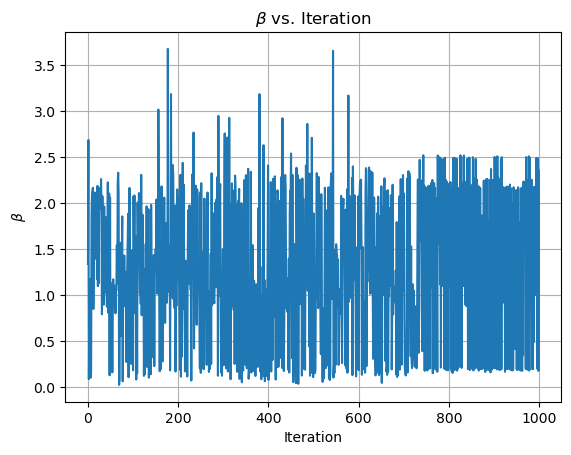

In [205]:
import numpy as np
import matplotlib.pyplot as plt

beta_lin = np.zeros([1000])
x_lin = np.zeros([1000])
for x in range(ite):
    x_lin[x] = x

# Plot
plt.plot(x_lin,np.squeeze((dist_3)))
plt.title(r'$\beta$ vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel(r'$\beta$')
plt.grid(True)
plt.savefig('Low_Linear.eps', format='eps')    
plt.show()

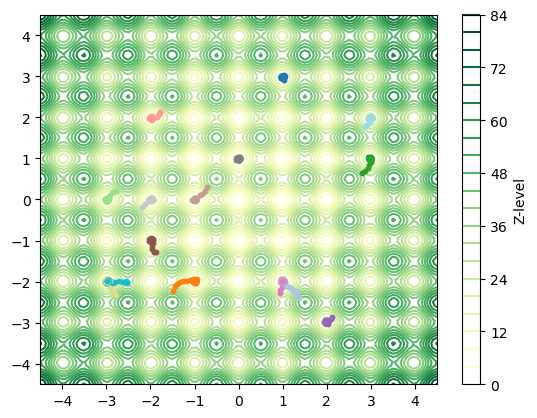

In [217]:
#Rastigin function and parameter space
XX = np.linspace(-4.5, 4.5, 100)     
YY = np.linspace(-4.5, 4.5, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    """
    #if x > ite-5:
    #if x > ite-100:
    #if x == 0 or x == ite -1:
    #if x < 50:
    if x<30 or x>ite-50:
    #if x%50 == 0 or x<50 or x>ite-55:
        color = cmap(norm(x))
        plt.scatter(*X_save_4[:, x*N:(x+1)*N], s=10, color=[color], zorder=10)
    """
    #if x%30 == 0:
    if x%50 == 0 or x<50 or x>ite-55:
        for j in range(N):
            color = colors[j]
            plt.scatter(*X_save_3[:, x*N+j], s=10, color=color, zorder=10)
"""
#Color bar for particle iteration number
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # An empty array is needed for the colorbar
plt.colorbar(sm, label='Iteration')    
"""

#Download image as eps
#plt.title('Contour plot of gradient descent')
#plt.savefig('Langevin_With_Noise.eps', format='eps')    
plt.show()


In [152]:
X_3

array([[ 3.46816754e+00, -3.83275663e+00, -2.28871467e+00,
         2.86906069e-01,  1.53659914e+00,  3.55987336e+00,
        -1.46793079e+00, -4.20471340e+00, -6.81528187e-01,
         8.49598178e+00, -1.05888984e+01,  3.40543875e+00,
         8.60498348e+00,  2.35025484e+00, -5.19011322e+00,
         5.67364078e+00,  2.29617772e+00, -5.43791661e+00,
        -3.52965601e+00,  9.82287429e+00],
       [ 8.95401969e-01,  2.00649645e+00, -1.05351588e+00,
        -2.01063292e+00,  9.96488028e-01, -8.67919079e-01,
         1.00356014e+00,  1.00627230e+00,  1.98158481e+00,
        -1.98711768e+00,  4.59053564e-03, -1.46444190e-02,
        -8.26243403e-03,  1.96250194e+00, -3.95655961e+00,
        -1.98578359e+00, -1.23992404e-02, -1.01166967e+00,
         9.89419252e-03,  3.16406648e-02]])

In [107]:
X_4 - lambdaa*C_4@gradf_4*h/(1+h*np.abs(C_4@gradf_4)) + np.sqrt(2/beta)*C_4_sqrt@xi_4*h**(1/2)

array([[ 0.01058656, -0.03461915,  0.98905395,  0.00999771, -1.00041314],
       [-2.10085368, -1.09460374, -0.16422712, -1.90675637, -1.14983793]])

In [98]:
lambdaa*C_4@gradf_4*h

array([[14.44407993,  3.87288864, 17.09844247, 15.97431922,  6.89791961],
       [-5.23979255, -1.47643862, -6.34074291, -5.70655098, -2.33985445]])

In [100]:
(1+h*np.abs(C_4@gradf_4))

array([[15.44407993,  4.87288864, 18.09844247, 16.97431922,  7.89791961],
       [ 6.23979255,  2.47643862,  7.34074291,  6.70655098,  3.33985445]])

In [135]:
lambdaa*C_4@gradf_4*h/(1+h*np.abs(C_4@gradf_4))

array([[ 0.1715963 , -0.40780355, -0.07392062,  0.64879535,  0.37458522,
        -0.77194257, -0.75510073,  0.71944816, -0.75770185, -0.66787684,
        -0.33193103,  0.60187582,  0.59545372, -0.76340597, -0.271823  ,
        -0.60578968,  0.60820257,  0.49696309,  0.76211877,  0.42967627],
       [-0.8365591 ,  0.47966551,  0.87193325,  0.8285142 , -0.89864897,
        -0.9136048 , -0.89850947,  0.82111443, -0.89774988, -0.81845436,
         0.82159001, -0.80264868,  0.80519132, -0.91393562, -0.90243929,
         0.80441823, -0.26311479, -0.86711678,  0.8852525 ,  0.85910618]])

In [140]:
X_4

array([[ -0.76220185,   0.97787909,   0.99190925,  -3.54104764,
          0.96177288,   1.52401889,   2.53299164,  -1.49975883,
          0.56772702,   2.29849727,   3.21543781,   2.57849937,
          0.47101238,   2.5690588 ,   4.32694749,  -0.66530779,
         -0.25040236,   1.83654714,   1.47660086,  -3.953044  ],
       [  0.4159141 ,  -4.03016845,  -4.51761714,  -3.76775692,
          0.65069912,   1.59573979,   0.55217502, -12.41712542,
          7.60526932,   7.41928441,  -1.43054636,   5.43224668,
          1.24695554,   2.66494585,  -2.3139673 ,  -3.38936697,
         -0.22584634,   3.51859057,  -3.48268155,  -2.48898858]])